# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("/Users/adrianonggowarsito/Downloads/Country-data.csv", sep = ",")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 1.) Fit a kmeans Model with any Number of Clusters

In [4]:
# Dropping the 'country' column and standardizing the remaining columns

names = df[["country"]].copy()
X = df.drop(["country"], axis=1)

In [5]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 2.) Pick two features to visualize across

In [6]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

In [7]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

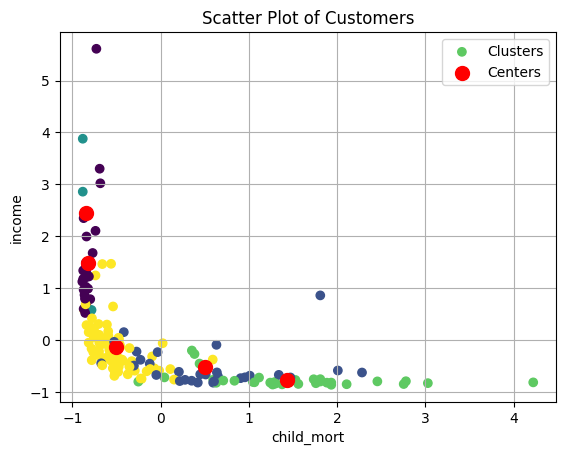

In [8]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 4


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, label='Clusters')

centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='red', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means

In [9]:
WCSSs = []
ks = range(1, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [10]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086876,
 700.3229986404375,
 620.1633712888422,
 565.8565705704663,
 517.9428657056242,
 469.6804644586921,
 448.9696204766005,
 402.006126668496,
 386.44425659201056,
 357.29383573815846,
 333.5411162208497,
 323.7452453349364]

In [11]:
# BONUS OPTIONAL
WCSSs = [KMeans(n_clusters = k, n_init = 30, init = "random").fit(X_scaled).inertia_ for k in range(1, 15)]

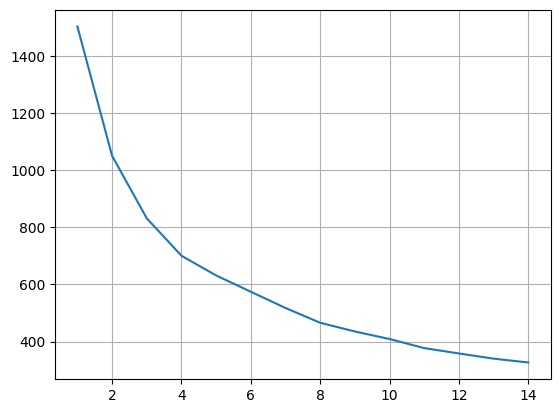

In [12]:
plt.plot(ks, WCSSs)
plt.grid()
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

# 6.) Do the same for a silhoutte plot

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
SCs = []
ks = range(2, 15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    SCs.append(silhouette_score(X_scaled, labels))

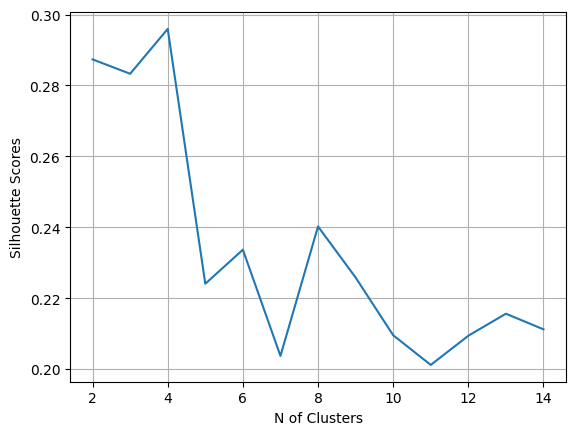

In [15]:
plt.plot(ks, SCs)
plt.xlabel("N of Clusters")
plt.ylabel("Silhouette Scores")
plt.grid()
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [34]:
kmeans = KMeans(n_clusters = 3, n_init = 30, init = "random").fit(X_scaled)

In [35]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [36]:
output = pd.concat([preds,df], axis = 1)

In [37]:
# Create a new DataFrame with cluster assignments
df['cluster'] = kmeans.labels_

# Initialize a dictionary to hold the list of countries by cluster
clusters = {i: [] for i in range(kmeans.n_clusters)}

# Fill the dictionary with country names
for index, row in df.iterrows():
    clusters[row['cluster']].append(row['country'])

# Now you can print the countries in each cluster
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}: {countries}")

Cluster 0: ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
Cluster 1: ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', '

In [40]:
print("Countries in Cluster 0:")
for country in clusters[0]:
    print(country)

Countries in Cluster 0:
Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Pakistan
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


In [38]:
print("Countries in Cluster 1:")
for country in clusters[1]:
    print(country)

Countries in Cluster 1:
Australia
Austria
Bahrain
Belgium
Brunei
Canada
Cyprus
Czech Republic
Denmark
Finland
France
Germany
Greece
Iceland
Ireland
Israel
Italy
Japan
Kuwait
Luxembourg
Malta
Netherlands
New Zealand
Norway
Portugal
Qatar
Singapore
Slovak Republic
Slovenia
South Korea
Spain
Sweden
Switzerland
United Arab Emirates
United Kingdom
United States


In [39]:
print("Countries in Cluster 2:")
for country in clusters[2]:
    print(country)

Countries in Cluster 2:
Albania
Algeria
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bahamas
Bangladesh
Barbados
Belarus
Belize
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Cambodia
Cape Verde
Chile
China
Colombia
Costa Rica
Croatia
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Fiji
Georgia
Grenada
Guatemala
Guyana
Hungary
India
Indonesia
Iran
Jamaica
Jordan
Kazakhstan
Kyrgyz Republic
Latvia
Lebanon
Libya
Lithuania
Macedonia, FYR
Malaysia
Maldives
Mauritius
Micronesia, Fed. Sts.
Moldova
Mongolia
Montenegro
Morocco
Myanmar
Nepal
Oman
Panama
Paraguay
Peru
Philippines
Poland
Romania
Russia
Samoa
Saudi Arabia
Serbia
Seychelles
Solomon Islands
Sri Lanka
St. Vincent and the Grenadines
Suriname
Tajikistan
Thailand
Tonga
Tunisia
Turkey
Turkmenistan
Ukraine
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam


#### Write an observation

Cluster 0: A majority of them have not really good economic conditions

Cluster 1: A majority of them are High Income, Developed economies, OECD level countries

Cluster 2: A majority of them are up and coming countries with potential, middle to upper middle income economies

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [42]:
# Step 1: Get the centroids from the KMeans model (you've already fitted the kmeans model)
centroids_scaled = kmeans.cluster_centers_

# Step 2: Inverse transform the centroids to the original data space
centroids = scaler.inverse_transform(centroids_scaled)

# Step 3: Create a dataframe with these centroids
centroids_df = pd.DataFrame(centroids, columns=X.columns)

# Step 4: Compute the descriptive statistics for the nonscaled data
cluster_descriptive_stats = df.drop('country', axis=1).groupby('cluster').describe()

# To display the mean and std for each cluster alongside the centroids:
# Compute mean and std for each cluster
cluster_means = df.drop('country', axis=1).groupby('cluster').mean()
cluster_stds = df.drop('country', axis=1).groupby('cluster').std()

# Step 5: Concat the centroids dataframe with your descriptive statistics
full_stats = pd.concat([centroids_df, cluster_means, cluster_stds], keys=['Centroids', 'Means', 'Stds'])

full_stats

child_mort    exports    health    imports        income  \
Centroids 0   92.961702  29.151277  6.388511  42.323404   3942.404255   
          1    5.000000  58.738889  8.807778  51.491667  45672.222222   
          2   21.927381  40.243917  6.200952  47.473404  12305.595238   
Means     0   92.961702  29.151277  6.388511  42.323404   3942.404255   
          1    5.000000  58.738889  8.807778  51.491667  45672.222222   
          2   21.927381  40.243917  6.200952  47.473404  12305.595238   
Stds      0   33.375229  18.160597  2.662015  17.732741   5641.790360   
          1    2.188933  41.930782  3.178015  36.843998  20852.017526   
          2   13.757919  19.029182  2.167233  20.103873   8180.073696   

             inflation  life_expec  total_fer          gdpp  
Centroids 0  12.019681   59.187234   5.008085   1922.382979  
          1   2.671250   80.127778   1.752778  42494.444444  
          2   7.600905   72.814286   2.307500   6486.452381  
Means     0  12.019681   59.187234   5.008085   1922.382979  
          1   2.671250   80.127778   1.752778  42494.444444  
          2   7.600905   72.814286   2.307500   6486.452381  
Stds      0  15.509958    6.443521   1.041382   2956.103925  
          1   4.077719    1.815742   0.373054  18991.079777  
          2   7.849516    3.960745   0.696957   5021.434052

# 9.) Write an observation about the descriptive statistics.

Cluster 0 appears to represent countries with high child mortality rates, low income, and low GDP per capita, which might suggest these are underdeveloped or developing countries with significant economic challenges.

Cluster 1 shows very high income and GDP per capita, low child mortality, and high life expectancy. The numbers suggest these are developed countries with high economic standards and well-established healthcare systems.

Cluster 2 seems to be an intermediate group with moderate values for the mentioned indicators. These could be countries that are in transition or developing with better economic conditions than cluster 0 but not as high as cluster 1.